Import Data

In [1]:
from ucimlrepo import fetch_ucirepo 
import numpy as np
import matplotlib.pyplot as plt
pi = np.pi
import pandas as pd

from ucimlrepo import fetch_ucirepo 


import seaborn as sns
%matplotlib inline

# Step 1: Pick (and clean) the data

This is some data about how different social factors impact secondary school performance.

In [2]:
# fetch dataset 
student_performance = fetch_ucirepo(id=320) 
  
# data (as pandas dataframes) 
X = student_performance.data.features 
y = student_performance.data.targets 
  
# metadata 
print(student_performance.metadata) 
  
# variable information 
print(student_performance.variables) 

{'uci_id': 320, 'name': 'Student Performance', 'repository_url': 'https://archive.ics.uci.edu/dataset/320/student+performance', 'data_url': 'https://archive.ics.uci.edu/static/public/320/data.csv', 'abstract': 'Predict student performance in secondary education (high school). ', 'area': 'Social Science', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 649, 'num_features': 30, 'feature_types': ['Integer'], 'demographics': ['Sex', 'Age', 'Other', 'Education Level', 'Occupation'], 'target_col': ['G1', 'G2', 'G3'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2008, 'last_updated': 'Fri Jan 05 2024', 'dataset_doi': '10.24432/C5TG7T', 'creators': ['Paulo Cortez'], 'intro_paper': {'title': 'Using data mining to predict secondary school student performance', 'authors': 'P. Cortez, A. M. G. Silva', 'published_in': 'Proceedings of 5th Annual Future Business Technology Conference', 'year'

In [3]:
X

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
644     MS   F   19       R     GT3       T     2     3  services     other   
645     MS   F   18       U     LE3       T     3     1   teacher  services   
646     MS   F   18       U     GT3       T     1     1     other     other   
647     MS   M   17       U     LE3       T     3     1  services  services   
648     MS   M   18       R     LE3       T     3     2  services     other   

     ... higher internet  romantic  famrel  freetime goout Dalc Walc health  \
0    ...    yes       no        no       4         3     4    1    1      3   
1    ...    yes      yes        no       5         3     3    1    1      3   
2    ...    yes      yes        no       4         3     2    2    3      3   
3    ...    yes      yes       yes       3         2     2    1    1      5   
4    ...    yes       no        no       4         3     2    1    2      5   
..   ...    ...      ...       ...     ...       ...   ...  ...  ...    ...   
644  ...    yes      yes        no       5         4     2    1    2      5   
645  ...    yes      yes        no       4         3     4    1    1      1   
646  ...    yes       no        no       1         1     1    1    1      5   
647  ...    yes      yes        no       2         4     5    3    4      2   
648  ...    yes      yes        no       4         4     1    3    4      5   

    absences  
0          4  
1          2  
2          6  
3          0  
4          0  
..       ...  
644        4  
645        4  
646        6  
647        6  
648        4  

[649 rows x 30 columns]

In [4]:
y

G1  G2  G3
0     0  11  11
1     9  11  11
2    12  13  12
3    14  14  14
4    11  13  13
..   ..  ..  ..
644  10  11  10
645  15  15  16
646  11  12   9
647  10  10  10
648  10  11  11

[649 rows x 3 columns]

Want to turn these categorical features into numbers.

In [5]:
### Convert objects to categories
obj_columns = X.select_dtypes(['object']).columns

for col in obj_columns:
    X[col] = X[col].astype('category')


### Converty categories to int8s
cat_columns = X.select_dtypes(['category']).columns


X[cat_columns] = X[cat_columns].apply(lambda x: x.cat.codes)

# running this cell makes pandas upset at how I'm doing this, so I've hidden the output

/var/folders/h6/qk346zkn507077y1r9ywwmc80000gn/T/ipykernel_57874/2956661868.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype('category')
/var/folders/h6/qk346zkn507077y1r9ywwmc80000gn/T/ipykernel_57874/2956661868.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype('category')
/var/folders/h6/qk346zkn507077y1r9ywwmc80000gn/T/ipykernel_57874/2956661868.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

In [6]:
X

school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
0         0    0   18        1        0        0     4     4     0     4  ...   
1         0    0   17        1        0        1     1     1     0     2  ...   
2         0    0   15        1        1        1     1     1     0     2  ...   
3         0    0   15        1        0        1     4     2     1     3  ...   
4         0    0   16        1        0        1     3     3     2     2  ...   
..      ...  ...  ...      ...      ...      ...   ...   ...   ...   ...  ...   
644       1    0   19        0        0        1     2     3     3     2  ...   
645       1    0   18        1        1        1     3     1     4     3  ...   
646       1    0   18        1        0        1     1     1     2     2  ...   
647       1    1   17        1        1        1     3     1     3     3  ...   
648       1    1   18        0        1        1     3     2     3     2  ...   

     higher  internet  romantic  famrel  freetime  goout  Dalc  Walc  health  \
0         1         0         0       4         3      4     1     1       3   
1         1         1         0       5         3      3     1     1       3   
2         1         1         0       4         3      2     2     3       3   
3         1         1         1       3         2      2     1     1       5   
4         1         0         0       4         3      2     1     2       5   
..      ...       ...       ...     ...       ...    ...   ...   ...     ...   
644       1         1         0       5         4      2     1     2       5   
645       1         1         0       4         3      4     1     1       1   
646       1         0         0       1         1      1     1     1       5   
647       1         1         0       2         4      5     3     4       2   
648       1         1         0       4         4      1     3     4       5   

     absences  
0           4  
1           2  
2           6  
3           0  
4           0  
..        ...  
644         4  
645         4  
646         6  
647         6  
648         4  

[649 rows x 30 columns]

In [7]:
X.dtypes

school         int8
sex            int8
age           int64
address        int8
famsize        int8
Pstatus        int8
Medu          int64
Fedu          int64
Mjob           int8
Fjob           int8
reason         int8
guardian       int8
traveltime    int64
studytime     int64
failures      int64
schoolsup      int8
famsup         int8
paid           int8
activities     int8
nursery        int8
higher         int8
internet       int8
romantic       int8
famrel        int64
freetime      int64
goout         int64
Dalc          int64
Walc          int64
health        int64
absences      int64
dtype: object

Now convert to numpy arrays so we can do math on the data.

In [8]:
Xnp = X.to_numpy()
print(Xnp)

[[ 0  0 18 ...  1  3  4]
 [ 0  0 17 ...  1  3  2]
 [ 0  0 15 ...  3  3  6]
 ...
 [ 1  0 18 ...  1  5  6]
 [ 1  1 17 ...  4  2  6]
 [ 1  1 18 ...  4  5  4]]


In [9]:
ynp = y.to_numpy()
print(ynp)

[[ 0 11 11]
 [ 9 11 11]
 [12 13 12]
 ...
 [11 12  9]
 [10 10 10]
 [10 11 11]]


Since Pandas are formatted with different labels/features for each column, and a different sample of data in each row, we transpose the matrix to get it in a form we like better.

In [10]:
Xnp = Xnp.T
ynp = ynp.T
print(Xnp.shape)

(30, 649)


# Part 2: Calculate eigenvalues, of C, histogram them, and fit best M-P distribution

Center the data.

In [11]:
Xmean = np.mean(Xnp, axis=1) # the mean of each row/feature across all data points
#changing sape for formatting purposes
Xmean.shape = (Xmean.size, 1)

X_circ = Xnp - Xmean
#print(Xmean.shape)
print("means of features after centering (should all be approx 0): ", np.mean(X_circ, axis=1))

means of features after centering (should all be approx 0):  [-4.37930808e-17  3.28448106e-17 -1.75172323e-16  4.37930808e-17
 -3.83189457e-17  1.47117381e-17 -1.64224053e-16 -1.53275783e-16
  1.09482702e-16  3.28448106e-17 -3.28448106e-17 -1.16325371e-17
 -6.56896212e-17  1.31379242e-16  4.65301483e-17 -5.47413510e-18
 -5.47413510e-18  1.74488056e-17  3.01077430e-17 -1.23168040e-17
 -6.84266887e-17  5.47413510e-17 -2.46336079e-17 -1.57381384e-16
  1.72435256e-16  8.75861616e-17 -1.25905107e-16  2.73706755e-18
 -1.86120593e-16  8.75861616e-17]


Calculate Sample Cov Matrix

In [12]:
m, N = X_circ.shape
gamma = m/N

print('number of rows/features, m is:', m)
print('number of cols/data, N is:', N)
print('gamma is:', gamma)
print('1/gamma is:', 1/gamma)

C = X_circ@X_circ.T/N # Sample Covariance Matrix
lamb_minus = (1 - np.sqrt(gamma))**2
lamb_plus = (1 + np.sqrt(gamma))**2

eig_vals, eig_vecs = np.linalg.eigh(C)

#print(eig_vals)
print("The number of eigenvalues is", len(eig_vals))

number of rows/features, m is: 30
number of cols/data, N is: 649
gamma is: 0.046224961479198766
1/gamma is: 21.633333333333333
The number of eigenvalues is 30


In [13]:
print(eig_vals)

[ 0.05152604  0.0735033   0.08177821  0.08407377  0.12530595  0.13974355
  0.14383113  0.16219291  0.20013945  0.20525621  0.22103834  0.24355781
  0.24670771  0.25531718  0.29479909  0.3718137   0.41579068  0.53536536
  0.61547308  0.67299266  0.76064932  0.84194604  1.05917787  1.33861433
  1.37540904  1.44033446  2.09326526  2.70659398  2.91516739 21.67649624]


Histogram of the eigenvalues of C

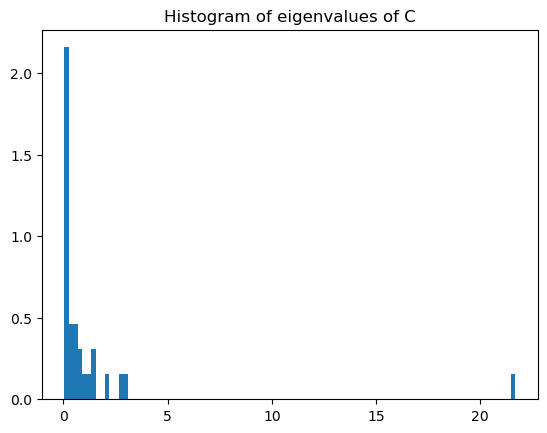

In [14]:
plt.title("Histogram of eigenvalues of C")
plt.hist(eig_vals,density=True,bins=100, label='Empirical eigenvalues');

Histogram of the eigenvalues of C without the big outlier

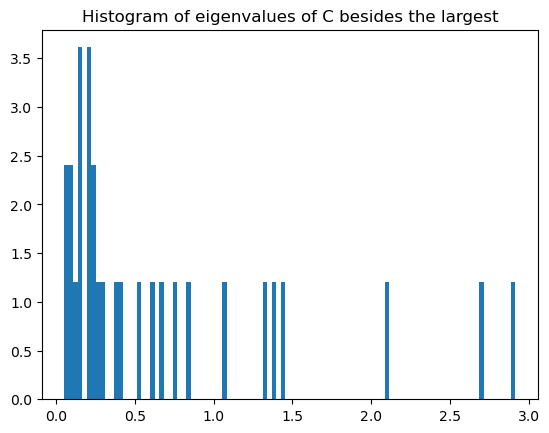

In [15]:
plt.title("Histogram of eigenvalues of C besides the largest")
plt.hist(eig_vals[:-1],density=True,bins=100, label='Empirical eigenvalues');

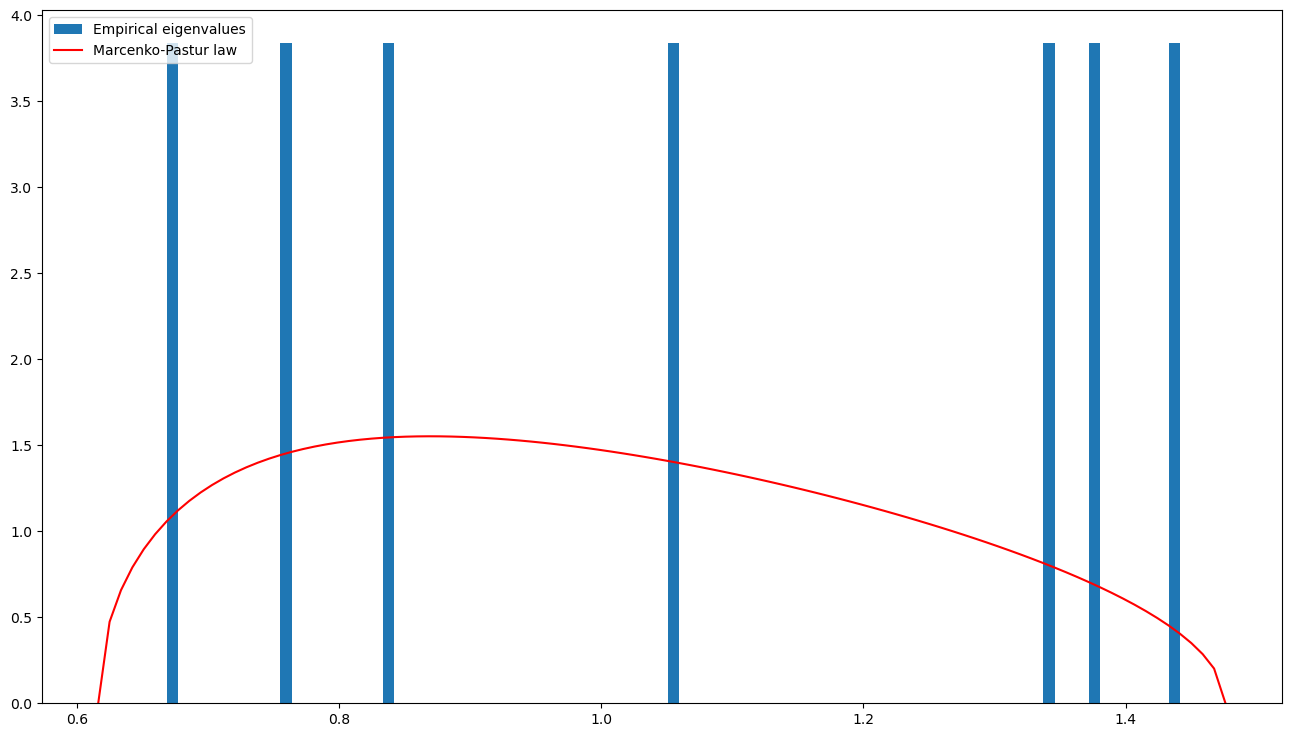

In [16]:
# Limiting measure
edges = np.linspace(lamb_minus,lamb_plus,100);
mu = np.sqrt((edges-lamb_minus)*(lamb_plus-edges))/(2*pi*gamma)

# Empirical histogram
plt.figure(figsize=(16,9))
plt.hist(eig_vals,bins=edges, weights=1/(m*(edges[1]-edges[0])*np.ones(m)), label='Empirical eigenvalues')
plt.plot(edges,mu/edges,'r',label='Marcenko-Pastur law')
_ = plt.legend()

We can conclude that the data doesn't fit the distribution very well.

# Part 3: Determining which eigenvalues are outliers?

Finding outliers

In [17]:
outliers = [e for e in eig_vals if e < lamb_minus or e > lamb_plus]
print(outliers)
print(len(outliers))

[0.05152604360203202, 0.07350329636072442, 0.08177820891741958, 0.0840737726825042, 0.12530594637800255, 0.13974355046280207, 0.14383112874409573, 0.16219290931858033, 0.2001394499474628, 0.20525620924943086, 0.2210383426984562, 0.2435578050099582, 0.24670770894905159, 0.25531717628862155, 0.2947990893395774, 0.3718137049165279, 0.4157906798110284, 0.5353653614938254, 0.615473075767388, 2.0932652565320846, 2.706593983342054, 2.9151673949211365, 21.676496239762976]
23


# Part 4: PCA

In [18]:
U, S, Vt = np.linalg.svd(X_circ, full_matrices=False)

print(U.shape)
print(S)
print(Vt.shape)

(30, 30)
[118.60879419  43.49647847  41.91156756  36.85823044  30.57412411
  29.87708931  29.47474686  26.21843693  23.37569201  22.21849245
  20.89909656  19.98604579  18.64006759  16.42705546  15.53406239
  13.83201392  12.87248412  12.65358855  12.57255008  11.97722357
  11.5417191   11.39695148  10.25978548   9.6615942    9.52331687
   9.0179576    7.38673666   7.28519441   6.90678213   5.7827677 ]
(30, 649)


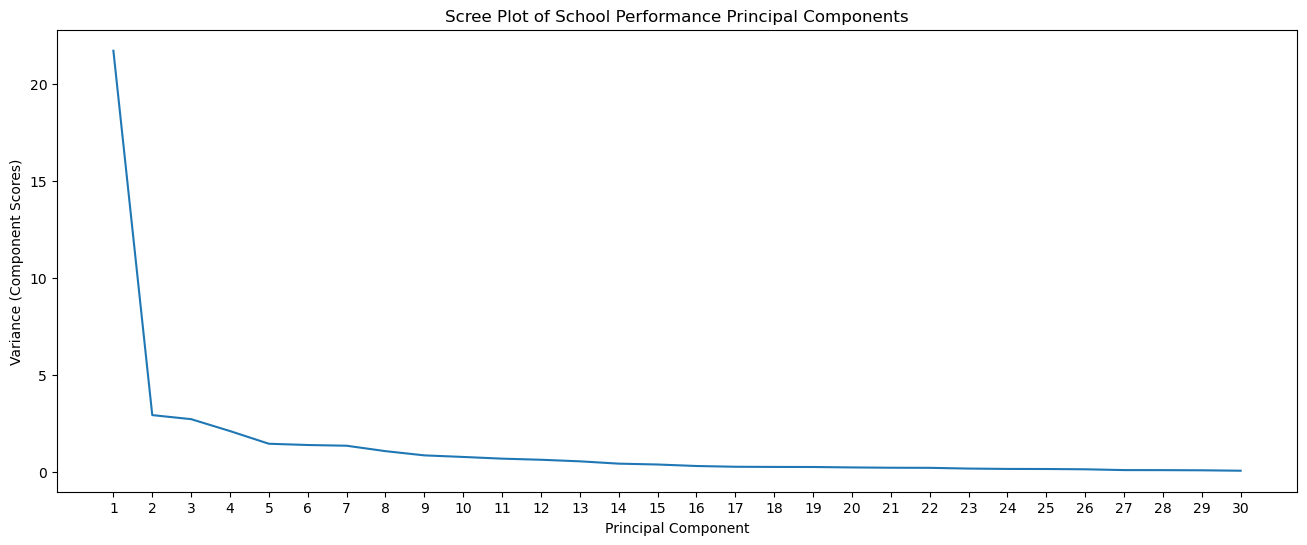

In [19]:
plt.figure(figsize=(16, 6))
plt.xticks([i for i in range(1,31)])
plt.xlabel("Principal Component")
plt.ylabel("Variance (Component Scores)")
plt.title("Scree Plot of School Performance Principal Components")
plt.plot([i for i in range(1,31)], np.square(S)/(N-1));

We can see visually that there are big dropoffs of variance around 2, 5, and 9 PCs

In [20]:
total_variance = np.sum(np.square(S))/(N-1)

print("total_variance = {:.3f} should approximately equal the sum of feature variances: {:.3f}"
      .format(total_variance, np.sum(np.var(Xnp, axis=1))))


two_dim_variance = np.sum(np.square(S[:2]))/(N-1)
three_dim_variance = np.sum(np.square(S[:3]))/(N-1)
five_dim_variance = np.sum(np.square(S[:5]))/(N-1)
nine_dim_variance = np.sum(np.square(S[:9]))/(N-1)

print("The variance of first two components is ", two_dim_variance)
ratio = two_dim_variance / total_variance
print("The ratio two_dim_variance / total_variance = ", ratio)

print("--------------------------------------------------------------")

print("The variance of first three components is ", three_dim_variance)
ratio = three_dim_variance / total_variance
print("The ratio three_dim_variance / total_variance = ", ratio)

print("--------------------------------------------------------------")

print("The variance of first five components is ", five_dim_variance)
ratio = five_dim_variance / total_variance
print("The ratio five_dim_variance / total_variance = ", ratio)

print("--------------------------------------------------------------")

print("The variance of first nine components is ", nine_dim_variance)
ratio = nine_dim_variance / total_variance
print("The ratio nine_dim_variance / total_variance = ", ratio)

total_variance = 41.412 should approximately equal the sum of feature variances: 41.348
The variance of first two components is  24.62961373288578
The ratio two_dim_variance / total_variance =  0.5947505773272356
--------------------------------------------------------------
The variance of first three components is  27.340384558794725
The ratio three_dim_variance / total_variance =  0.6602096840430871
--------------------------------------------------------------
The variance of first five components is  30.879437362561468
The ratio five_dim_variance / total_variance =  0.7456699645436057
--------------------------------------------------------------
The variance of first nine components is  35.501706776808426
The ratio nine_dim_variance / total_variance =  0.857287525115202


I'm going to choose to observe the first 5 PCs, since it does good enough and more dimensions would be unruly to plot.

In [21]:
mu = Xmean
Q = U[:,[0, 1, 2, 3, 4]]
print('Q.shape = ', Q.shape)
print('X_circ.shape = ', X_circ.shape)

PCs_centered = Q.T @ X_circ

print('PCs_centered.shape = ', PCs_centered.shape)

PCs_mean = Q.T @ Xmean
print('PCs_mean.shape = ', PCs_mean.shape)

PCs = PCs_mean + PCs_centered
print('PCs.shape = ', PCs.shape)

Q.shape =  (30, 5)
X_circ.shape =  (30, 649)
PCs_centered.shape =  (5, 649)
PCs_mean.shape =  (5, 1)
PCs.shape =  (5, 649)


# Part 5: Project the Data

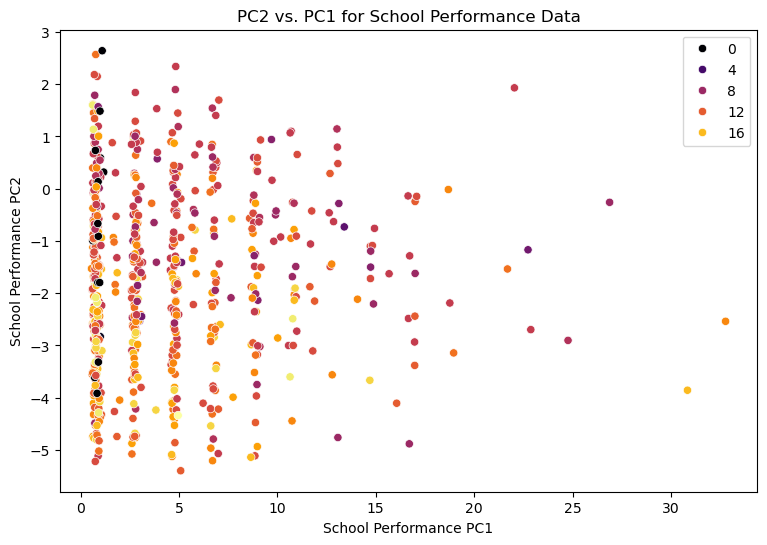

In [22]:
plt.figure(figsize=(9, 6))
plt.title("PC2 vs. PC1 for School Performance Data")
plt.xlabel("School Performance PC1")
plt.ylabel("School Performance PC2")
sns.scatterplot(x = PCs[0, :], y = PCs[1, :], hue= y['G3'].to_numpy(), palette='inferno');

Can see from the above graph, two PCs don't really cut it.

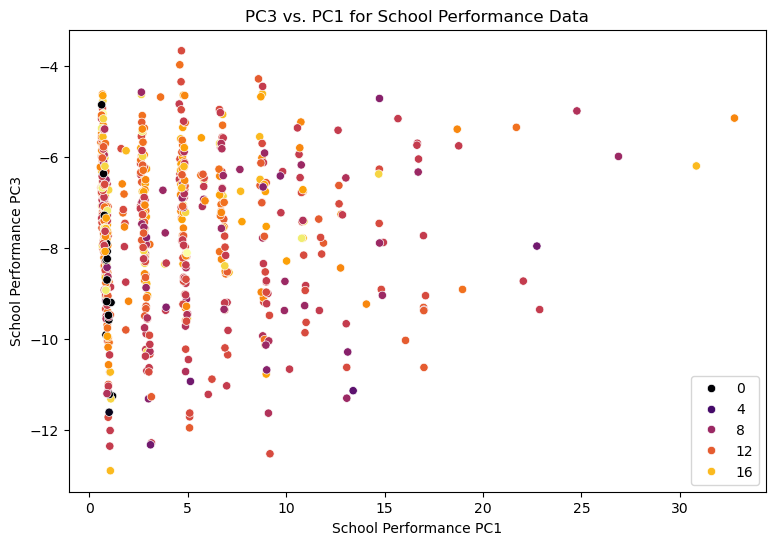

In [23]:
plt.figure(figsize=(9, 6))
plt.title("PC3 vs. PC1 for School Performance Data")
plt.xlabel("School Performance PC1")
plt.ylabel("School Performance PC3")
sns.scatterplot(x = PCs[0, :], y = PCs[2, :], hue= y['G3'].to_numpy(), palette='inferno');

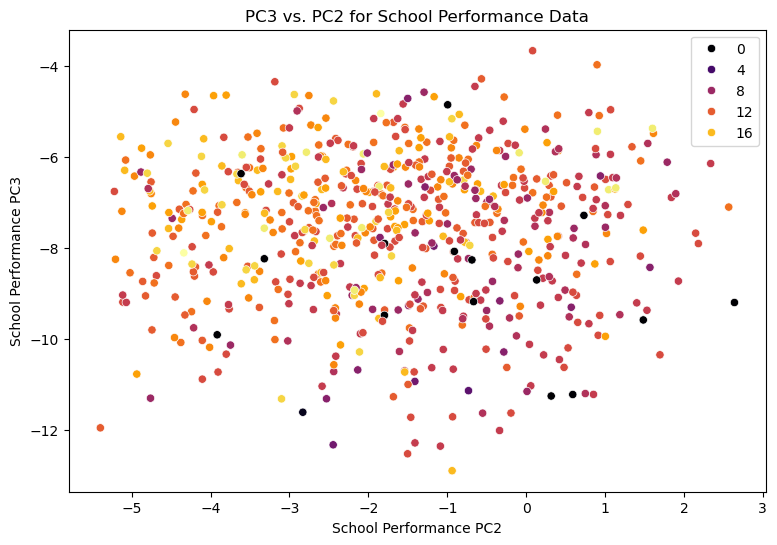

In [24]:
plt.figure(figsize=(9, 6))
plt.title("PC3 vs. PC2 for School Performance Data")
plt.xlabel("School Performance PC2")
plt.ylabel("School Performance PC3")
sns.scatterplot(x = PCs[1, :], y = PCs[2, :], hue= y['G3'].to_numpy(), palette='inferno');

In [25]:
PCdf = pd.DataFrame(data=PCs.T, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
guh = pd.concat([PCdf, y], axis=1) 
guh

PC1       PC2       PC3       PC4        PC5  G1  G2  G3
0    4.770820 -1.941235 -6.759534  1.095342 -16.863318   0  11  11
1    2.688708  1.005930 -6.492180  0.206895 -15.476193   9  11  11
2    6.729952  0.312722 -6.876292  0.858326 -13.084200  12  13  12
3    0.611806 -2.582423 -5.979268 -1.103219 -14.643675  14  14  14
4    0.698886 -2.674170 -7.190306 -0.957796 -15.126322  11  13  13
..        ...       ...       ...       ...        ...  ..  ..  ..
644  4.785204 -1.829842 -7.938944 -1.188398 -18.217544  10  11  10
645  4.803436 -1.798681 -6.208951  2.492926 -17.499192  15  15  16
646  6.729090  0.412956 -5.819307 -1.920517 -16.827689  11  12   9
647  7.041484 -1.440050 -9.809495  3.073765 -15.445400  10  10  10
648  4.932543 -1.821104 -9.607965 -0.649286 -16.494678  10  11  11

[649 rows x 8 columns]

In [26]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "plotly_mimetype+notebook"

fig = px.scatter_3d(guh, x='PC1', y='PC2', z='PC3', color='G3')
fig.update_traces(marker_size = 3)
fig.show()

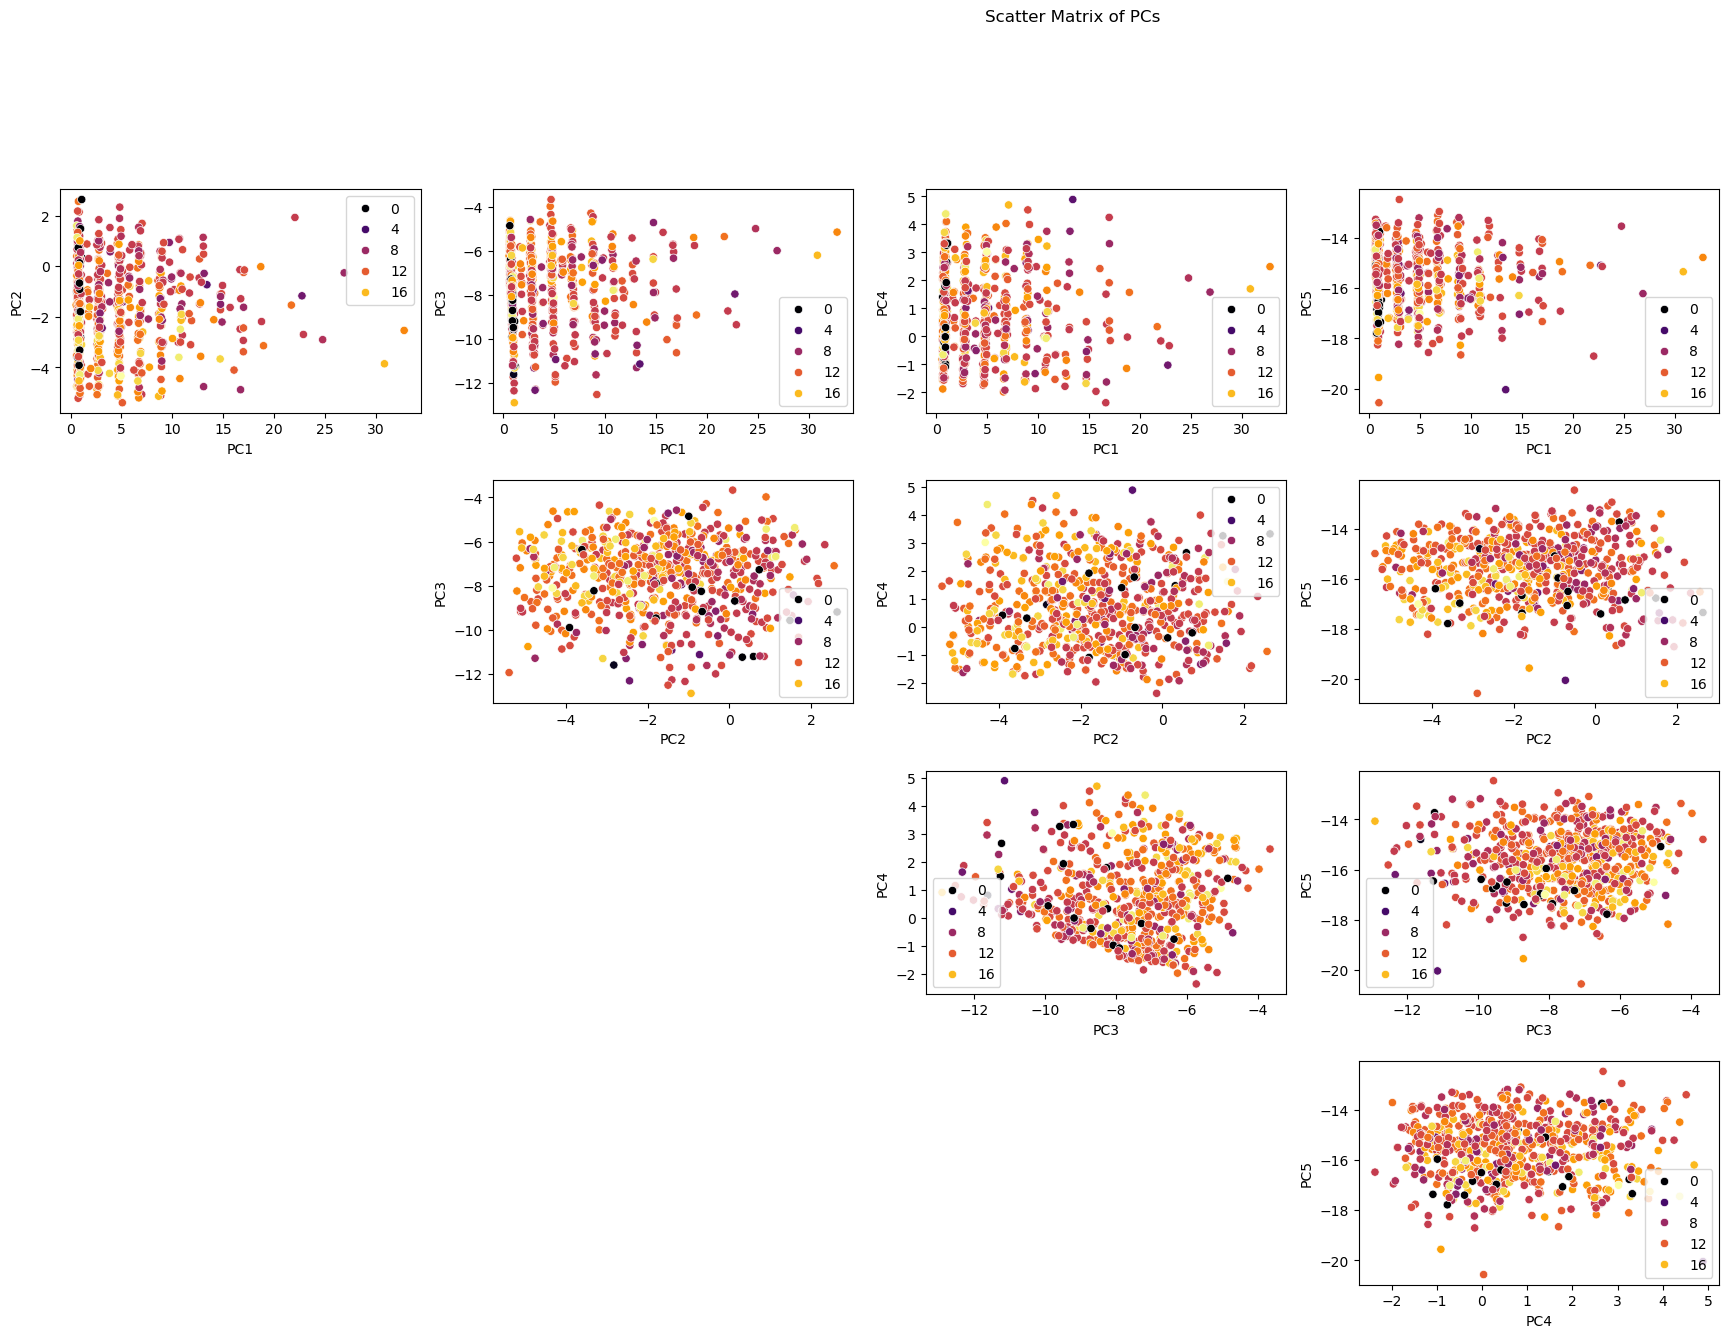

In [27]:
num = 5
plt.figure(figsize=(27, 18))
plt.suptitle("Scatter Matrix of PCs")
plt.subplots_adjust(wspace=0.2, hspace=0.3)
for i in range(0, num):
    for j in range(i):
        plt.subplot(num, num, i+num*j)
        sns.scatterplot(y = PCs[i,: ], x = PCs[j, :], hue= y['G3'].to_numpy(), palette='inferno')
        plt.ylabel("PC" + str(i+1))
        plt.xlabel("PC" + str(j+1))